In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Importacion de los CSV

In [8]:
csv1 = pd.read_csv("C:/Users/Bryan/Documents/Portafolio/Propiedades-RM/2023-07-18 Propiedades Web Scrape.csv")
csv2 = pd.read_csv("C:/Users/Bryan/Documents/Portafolio/Propiedades-RM/2023-03-08 Precios Casas RM.csv")

Realizamos una union de los CSV, uniendo solo los datos que no estan en el otro CSV, luego eliminamos los duplicados

In [9]:
csvun = csv2[~csv2["id"].isin(csv1['id'])]
unioncsv = pd.concat([csv1, csvun], ignore_index=True)
unioncsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13869 entries, 0 to 13868
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   13869 non-null  int64  
 1   Price_UF    13869 non-null  float64
 2   Price_USD   13869 non-null  float64
 3   Comuna      13869 non-null  object 
 4   Ubicacion   13869 non-null  object 
 5   Dorms       13780 non-null  float64
 6   Baths       13678 non-null  float64
 7   Built Area  13436 non-null  float64
 8   Total Area  13496 non-null  float64
 9   Parking     9655 non-null   float64
 10  id          13869 non-null  int64  
 11  Realtor     12257 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 1.3+ MB


In [10]:
df1 = unioncsv.drop_duplicates(subset=["id"], keep="first")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13869 entries, 0 to 13868
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   13869 non-null  int64  
 1   Price_UF    13869 non-null  float64
 2   Price_USD   13869 non-null  float64
 3   Comuna      13869 non-null  object 
 4   Ubicacion   13869 non-null  object 
 5   Dorms       13780 non-null  float64
 6   Baths       13678 non-null  float64
 7   Built Area  13436 non-null  float64
 8   Total Area  13496 non-null  float64
 9   Parking     9655 non-null   float64
 10  id          13869 non-null  int64  
 11  Realtor     12257 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 1.3+ MB


Eliminamos los datos que corresponden a arriendos u otros datos erroneos, luego limpiamos las filas que no contienen "Total Area" y "Built Area"

In [11]:
dfu = df1[df1["Price_USD"] >= 100]

In [12]:
dfx = dfu.dropna(subset=["Total Area","Built Area"], axis=0)
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13394 entries, 0 to 13868
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price_CLP   13394 non-null  int64  
 1   Price_UF    13394 non-null  float64
 2   Price_USD   13394 non-null  float64
 3   Comuna      13394 non-null  object 
 4   Ubicacion   13394 non-null  object 
 5   Dorms       13317 non-null  float64
 6   Baths       13243 non-null  float64
 7   Built Area  13394 non-null  float64
 8   Total Area  13394 non-null  float64
 9   Parking     9352 non-null   float64
 10  id          13394 non-null  int64  
 11  Realtor     11900 non-null  object 
dtypes: float64(7), int64(2), object(3)
memory usage: 1.3+ MB


Con los datos actuales podemos obtener:
1- Valor medio, moda y mediana de las propiedades
2- Inmobiliarias o corredoras con mayor publicaciones
3- Comunas con mayor y menor numero de publicaciones
4- Valor promedio de una propiedad en X comuna
5- Mapa de calor entre las variables

Valor medio, moda y mediana de las propiedades

In [25]:
print(dfx["Price_CLP"].mean().astype(int))
print(dfx["Price_CLP"].median().astype(int))
print(dfx["Price_CLP"].mode().astype(int))

373116658
223689800
0    120000000
Name: Price_CLP, dtype: int32


Realizamos un escaneo general de los datos:

In [14]:
dfa = dfx.groupby("Comuna")["id"].nunique()
dfa.nlargest(10)

Comuna
PuenteAlto     1236
LasCondes      1214
Maipú          1124
Colina          985
LoBarnechea     775
LaFlorida       766
Peñalolén       535
SanBernardo     491
LaReina         460
Santiago        439
Name: id, dtype: int64

In [15]:
dfa.nsmallest(10)

Comuna
Alhué              1
SanPedro           4
MaríaPinto         5
Tiltil            27
ElMonte           30
SanRamón          31
SanJosédeMaipo    33
Curacaví          36
CaleradeTango     38
Pirque            38
Name: id, dtype: int64

In [16]:
dfd = dfx.groupby("Realtor")["id"].nunique()
dfd.nlargest(10)

Realtor
Unne                                  1617
Nexxos                                1024
Easyprop                               773
Mi Llave                               442
Berrios Zegers                         391
Brokers Inmobiliarios                  378
Grupo Premium Propiedades Santiago     364
Movahome Corredores Integrados         359
Propiedades Centro Santiago SPA        347
Corredores Asociados                   317
Name: id, dtype: int64

In [17]:
dfx[["Price_UF", "Dorms", "Baths", "Built Area","Total Area","Parking"]].corr().round(2)

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking
Price_UF,1.00,0.40,0.64,-0.00,0.07,0.10
Dorms,0.40,1.00,0.59,0.02,0.04,0.10
Baths,0.64,0.59,1.00,0.00,0.05,0.08
Built Area,-0.00,0.02,0.00,1.00,0.01,0.00
Total Area,0.07,0.04,0.05,0.01,1.00,0.01
Parking,0.10,0.10,0.08,0.00,0.01,1.00


In [18]:
dfx[["Price_UF", "Dorms", "Baths", "Built Area","Total Area","Parking"]].cov().round(2)

,Price_UF,Dorms,Baths,Built Area,Total Area,Parking
Price_UF,1.130962e+08,6758.84,9710.11,-2.155873e+07,6973636.33,14039.84
Dorms,6.758840e+03,2.60,1.34,6.068400e+02,540.12,1.91
Baths,9.710110e+03,1.34,2.08,1.700000e+02,624.03,1.48
Built Area,-2.155873e+07,606.84,170.00,1.871986e+11,20811997.69,854.91
Total Area,6.973636e+06,540.12,624.03,2.081200e+07,89941630.10,1471.99
Parking,1.403984e+04,1.91,1.48,8.549100e+02,1471.99,186.74


In [19]:
dfp = dfx.groupby("Comuna")["Price_UF"].mean().astype(int)
dfp.nlargest(10)

Comuna
LoBarnechea      28181
Vitacura         25837
Alhué            22000
SanPedro         21447
LasCondes        20990
Providencia      18574
LaReina          16208
Colina           14346
Pirque           13731
CaleradeTango    12262
Name: Price_UF, dtype: int32

Inmobiliarias o corredoras con mayor publicaciones

Text(0.5, 0.92, 'Inmobiliarias o corredoras con mayor numero de publicaciones')

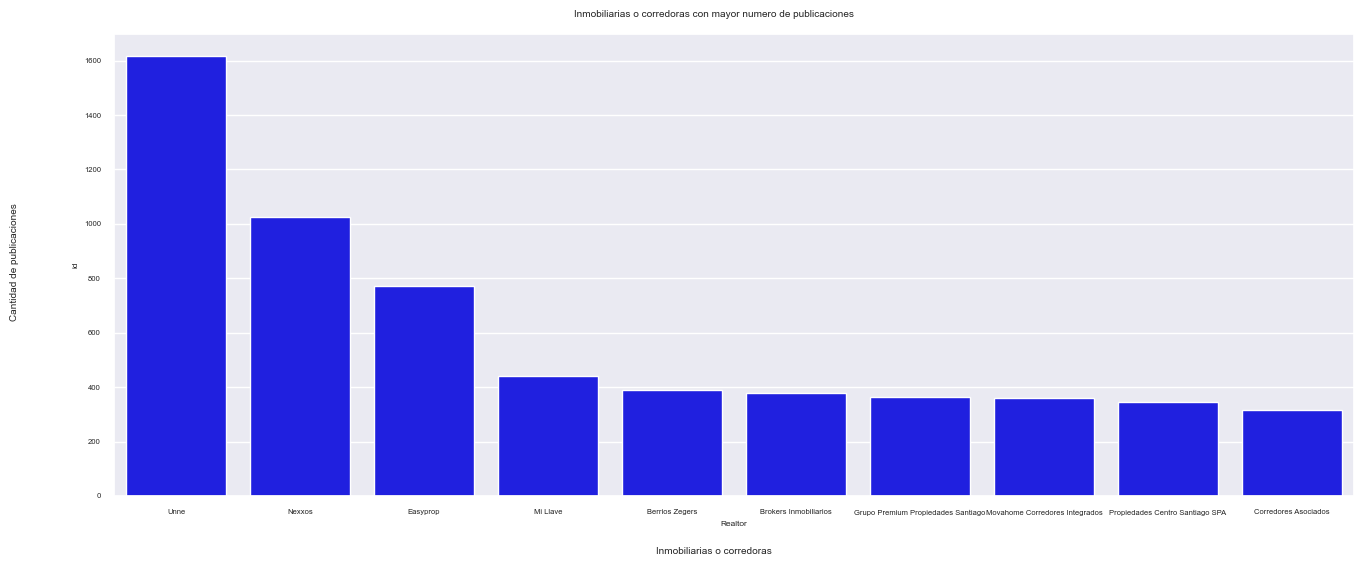

In [71]:
sns.set(font_scale=0.5)
fig, axs = plt.subplots(nrows=1, figsize=[16,6], dpi=100)
sns.barplot(data=dfd.nlargest(10), color="blue")

fig.supylabel("Cantidad de publicaciones", x=0.06)
fig.supxlabel("Inmobiliarias o corredoras")
fig.suptitle("Inmobiliarias o corredoras con mayor numero de publicaciones", y=0.92)

Comunas con mayor y menor numero de publicaciones

Text(0.5, 0.92, 'Comunas con mayor y menor numero de publicaciones')

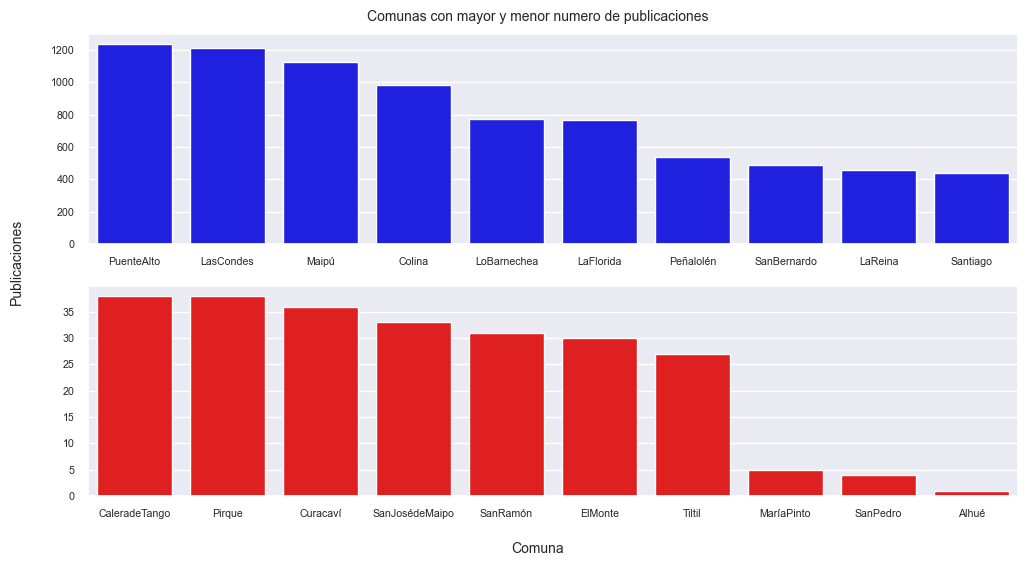

In [72]:
sns.set(font_scale=0.7)
fig, axs = plt.subplots(nrows=2, figsize=[12,6], dpi=100)
sns.barplot(data=dfx.groupby("Comuna")["id"].nunique().nlargest(10), color="blue", ax=axs[0])
sns.barplot(data=dfx.groupby("Comuna")["id"].nunique().nsmallest(10).sort_values(ascending=False), color="red", ax=axs[1])

axs[0].set(xlabel=None, ylabel=None)
axs[1].set(xlabel=None, ylabel=None)
fig.supylabel("Publicaciones", x=0.06)
fig.supxlabel("Comuna")
fig.suptitle("Comunas con mayor y menor numero de publicaciones", y=0.92)

Valor promedio de una propiedad en X comuna

Text(0.5, 0.92, 'Promedio de Precio en UF por Comuna')

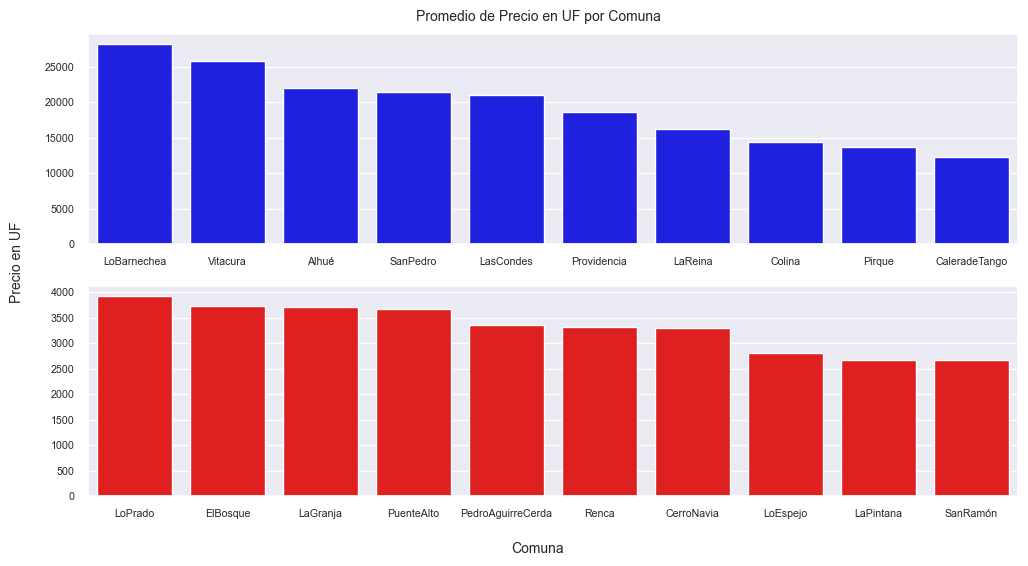

In [21]:
sns.set(font_scale=0.7)
fig, axs = plt.subplots(nrows=2, figsize=[12,6], dpi=100)
sns.barplot(data=dfp.nlargest(10), color="blue", ax=axs[0])
sns.barplot(data=dfp.nsmallest(10).sort_values(ascending=False), color="red", ax=axs[1])

axs[0].set(xlabel=None, ylabel=None)
axs[1].set(xlabel=None, ylabel=None)
fig.supylabel("Precio en UF", x=0.06)
fig.supxlabel("Comuna")
fig.suptitle("Promedio de Precio en UF por Comuna", y=0.92)


Mapa de calor

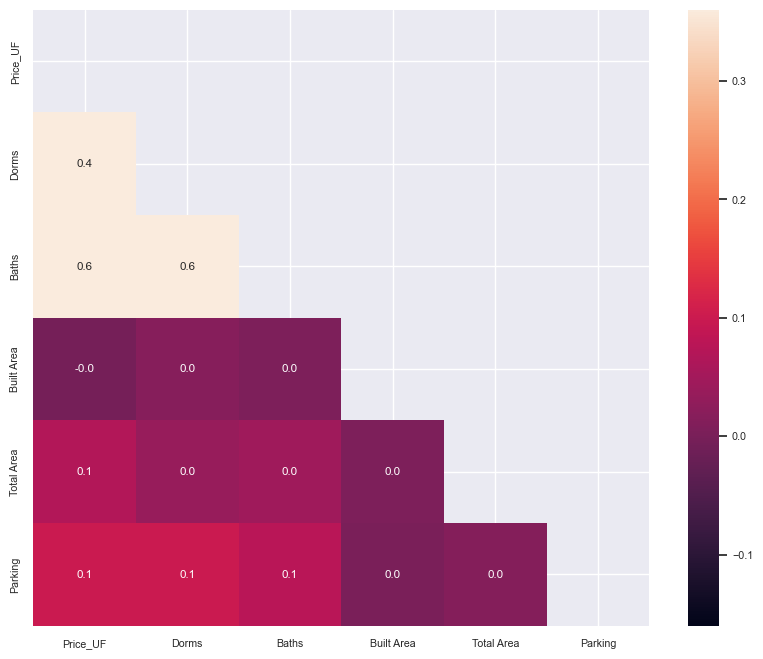

In [74]:
corr = dfx[["Price_UF", "Dorms", "Baths", "Built Area","Total Area","Parking"]].corr()
mask = np.triu(corr)
    
fig, ax = plt.subplots( figsize=(10,8) )
sns.heatmap(data=corr, mask=mask, annot=True, fmt="0.1f", vmin="-0.16", vmax="0.36", square=True)
fig.savefig('heatmap.png')

Segun los resultados obtenidos anteriormente podemos graficar:
Una regresión linear de "Price_UF" y "Baths" (Alta correlación, 0.6)
Una regresión linear de "Price_UF" y "Total Area" (Baja correlación, 0.1) (Realizo el calculo solo por curiosidad)

In [67]:
X = dfx["Price_UF"].values.reshape(-1, 1)
y = dfx["Total Area"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()


In [68]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
entrada = [[100000],[200000],[300000],[400000]]
model.predict(entrada)

array([ 6707.36145237, 13278.79445688, 19850.22746139, 26421.6604659 ])

In [48]:
print("Error cuadrático medio:", mse)
print("Coeficiente de determinación:", r2)

Error cuadrático medio: 36241070.516713075
Coeficiente de determinación: 0.005941277748913176


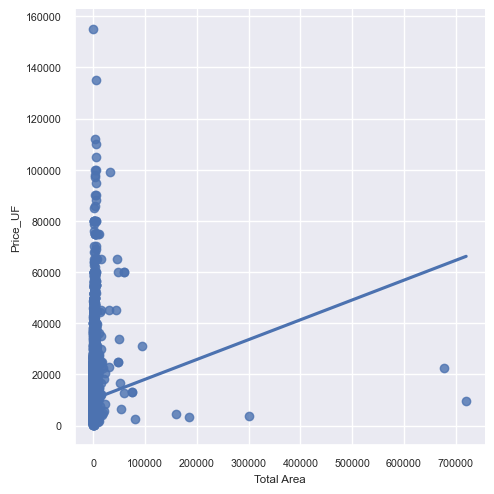

In [59]:
sns.lmplot(x="Total Area", y="Price_UF", data=dfx, ci=None)
plt.show()

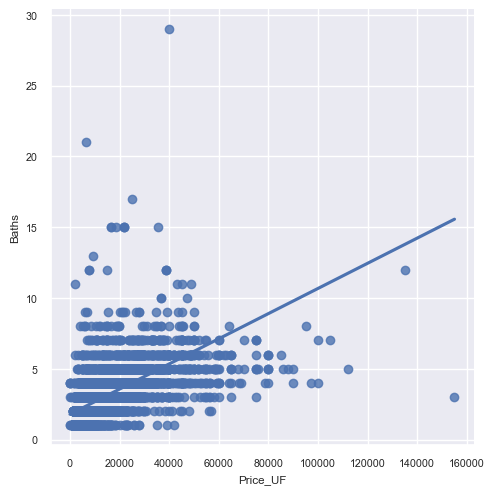

In [57]:
sns.lmplot(x="Price_UF", y="Baths", data=dfx, ci=None)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

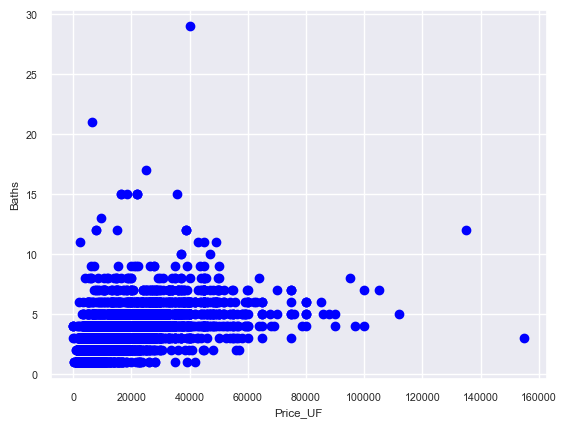

In [63]:
plt.ylabel("Baths")
plt.xlabel("Price_UF")
plt.scatter(dfx["Price_UF"], dfx["Baths"], color="blue")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

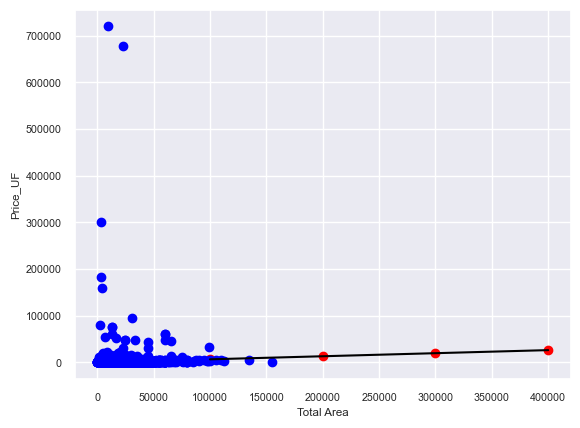

In [70]:
plt.scatter(entrada, model.predict(entrada), color="red")
plt.plot(entrada, model.predict(entrada), color="black")

plt.ylabel("Price_UF")
plt.xlabel("Total Area")
plt.scatter(dfx["Price_UF"], dfx["Total Area"], color="blue")
plt.show